In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
# import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
#plt.style.use('fivethirtyeight')
import xgboost as xgb
import sklearn
import random
from NecessaryModules.getData import getData
from NecessaryModules.splitData import split_data

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
filename = 'Dataset/ionosphere.csv'
dataset,label=getData(filename)
# dataset=pd.DataFrame(dataset) #from dataset_list to dataset_dataframe after suffling
print(dataset)
print(label)

[[1.0, 0.0, 0.99539, -0.05889, 0.85243, 0.02306, 0.83398, -0.37708, 1.0, 0.0376, 0.85243, -0.17755, 0.59755, -0.44945, 0.60536, -0.38223, 0.84356, -0.38542, 0.58212, -0.32192, 0.56971, -0.29674, 0.36946, -0.47357, 0.56811, -0.51171, 0.41078, -0.46168, 0.21266, -0.3409, 0.42267, -0.54487, 0.18641, -0.453], [1.0, 0.0, 1.0, -0.18829, 0.93035, -0.36156, -0.10868, -0.93597, 1.0, -0.04549, 0.50874, -0.67743, 0.34432, -0.69707, -0.51685, -0.97515, 0.05499, -0.62237, 0.33109, -1.0, -0.13151, -0.453, -0.18056, -0.35734, -0.20332, -0.26569, -0.20468, -0.18401, -0.1904, -0.11593, -0.16626, -0.06288, -0.13738, -0.02447], [1.0, 0.0, 1.0, -0.03365, 1.0, 0.00485, 1.0, -0.12062, 0.88965, 0.01198, 0.73082, 0.05346, 0.85443, 0.00827, 0.54591, 0.00299, 0.83775, -0.13644, 0.75535, -0.0854, 0.70887, -0.27502, 0.43385, -0.12062, 0.57528, -0.4022, 0.58984, -0.22145, 0.431, -0.17365, 0.60436, -0.2418, 0.56045, -0.38238], [1.0, 0.0, 1.0, -0.45161, 1.0, 1.0, 0.71216, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.

In [3]:
pcaTrain = PCA(n_components=20).fit(dataset)# --train-- pca with the "dataset" Dataframe
print(pcaTrain)
compressed_dataset_X= pcaTrain.transform(dataset) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X))
print(len(compressed_dataset_X[0]))
print(compressed_dataset_X)

PCA(n_components=20)
<class 'numpy.ndarray'>
20
[[-8.59332860e-01 -9.61406757e-01 -5.86082357e-01 ...  2.04483007e-03
   6.17162292e-02 -9.51471379e-02]
 [ 7.65524410e-01 -1.06271411e+00 -1.39733865e+00 ...  4.29774597e-02
   3.92008382e-01  3.03880796e-01]
 [-1.11681736e+00 -3.92255939e-01  7.98828031e-03 ...  9.68308725e-03
   1.86505649e-01  7.08624174e-02]
 ...
 [-2.00968648e+00  7.02142791e-03  3.45603502e-01 ... -4.95037761e-03
   6.48951591e-02 -1.61964951e-02]
 [-1.87850608e+00 -2.58263391e-01  2.79973413e-01 ...  7.72608660e-03
   6.90995922e-02 -9.90757043e-02]
 [-1.54878315e+00 -1.87526433e-01  2.17570815e-01 ...  1.68335143e-03
   8.91444630e-02  3.30264587e-02]]


In [4]:
# from NecessaryModules.splitData import split_data
X_train, y_train, X_test, y_test = split_data(dataset,label)
print(len(X_train[0]))

34


In [5]:
# compressed_dataset_X_train,y_train,compressed_dataset_X_test,y_test=split_data(compressed_dataset_X,label)

In [6]:
compressed_dataset_X_train= pcaTrain.transform(X_train) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_train))
print(len(compressed_dataset_X_train))
print(compressed_dataset_X_train)

compressed_dataset_X_test= pcaTrain.transform(X_test) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_test))
print(len(compressed_dataset_X_test))
print(compressed_dataset_X_test)

<class 'numpy.ndarray'>
240
[[-6.44376519e-01  7.08414856e-01  2.05374252e-01 ... -1.89439290e-01
  -8.00161676e-02 -2.07967722e-01]
 [ 1.27183384e+00 -1.43762982e-01 -8.18662445e-01 ...  1.97904284e-02
  -8.72081496e-02 -7.53467966e-02]
 [-2.14496873e+00  9.36788323e-02  4.70448766e-01 ... -1.82681734e-02
   8.28670708e-02 -2.94827757e-02]
 ...
 [-9.63605279e-01 -2.62877885e-01 -7.59176594e-01 ... -2.75984479e-01
  -5.06505550e-01 -6.87653819e-02]
 [ 1.29786762e+00 -1.54536987e-01 -8.76249845e-01 ...  1.32467045e-01
   1.14410871e-01  7.20873736e-02]
 [ 2.53712244e+00 -7.67280221e-01  1.51674901e+00 ...  3.74291313e-02
   2.53064984e-02  8.41975213e-04]]
<class 'numpy.ndarray'>
111
[[ 0.84118993 -0.62380799 -0.910987   ... -0.04599337  0.00305829
   0.03568066]
 [ 1.41301682 -0.68417543 -0.22045242 ... -0.11288988 -0.06433759
   0.17074908]
 [-0.33590708  0.08206622 -0.26109527 ... -0.11845169  0.12477571
   0.04755266]
 ...
 [ 1.27772236 -0.22899135 -0.23037415 ... -0.44203402 -0.263

# Tune D tree for Ada-boost

In [7]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)

model_dt.fit(compressed_dataset_X_train, y_train)

DecisionTreeClassifier(max_depth=12, max_features='sqrt')

In [8]:
# Finding mean absolute error
preds = model_dt.predict(compressed_dataset_X_test)
preds = preds.astype(int)
mae = np.abs(y_test-preds).mean()
mae

0.21621621621621623

In [9]:
# Defining the best parameter with optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
K = 5 # stratified 5 fold cross validation, The folds are made by preserving the percentage of samples for each class.
skf = StratifiedKFold(n_splits = K, random_state = 42, shuffle = True)


train_tunned_dt = np.array(compressed_dataset_X)
target_train_tunned_dt = np.array(label)

oof_preds_dt = np.zeros((len(train_tunned_dt)))
abs_error_arr_dt=[]
def objective(trial):

 for train_index, val_index in (skf.split(compressed_dataset_X,label)):
    train_X, valid_X = train_tunned_dt[train_index], train_tunned_dt[val_index]
    train_Y, valid_Y = target_train_tunned_dt[train_index], target_train_tunned_dt[val_index]
    
        
        # train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.25,random_state=0)
    param = {
        'criterion':trial.suggest_categorical('criterion',["gini", "entropy", "log_loss"]), #The function to measure the quality of a split.
        'splitter':trial.suggest_categorical('splitter',["best", "random"]),
        'max_features':trial.suggest_categorical('max_features',['sqrt','log2',1,2,3,4,5,6,7,8,9,10,11]), #a categorical value can be an integer
        'random_state':trial.suggest_int('random_state',0,5),


        }
    model = DecisionTreeClassifier(**param)  
        
    model.fit(train_X,train_Y)
        
    preds = model.predict(valid_X)
    oof_preds_dt[val_index] = preds # preds gives total 3846 predicted value for valid_X


 
#  print(len(oof_preds_dt))
      
 mae = mean_absolute_error(target_train_tunned_dt, oof_preds_dt)
        
 return mae

In [10]:
# this is the main optuna for optimizing a object-->"objective"
study = optuna.create_study(direction='minimize')

[I 2024-02-18 22:33:22,055] A new study created in memory with name: no-name-f5666183-06cd-494e-ae63-11bfedb9df51


In [11]:

study.optimize(objective, n_trials=100) # 150 bar "objective" object ke trial kore kore dekhbe, here total 5*100=750
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2024-02-18 22:33:22,087] Trial 0 finished with value: 0.14814814814814814 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_features': 11, 'random_state': 2}. Best is trial 0 with value: 0.14814814814814814.
[I 2024-02-18 22:33:22,109] Trial 1 finished with value: 0.1282051282051282 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_features': 6, 'random_state': 5}. Best is trial 1 with value: 0.1282051282051282.
[I 2024-02-18 22:33:22,136] Trial 2 finished with value: 0.11396011396011396 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_features': 'log2', 'random_state': 3}. Best is trial 2 with value: 0.11396011396011396.
[I 2024-02-18 22:33:22,165] Trial 3 finished with value: 0.1396011396011396 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_features': 6, 'random_state': 2}. Best is trial 2 with value: 0.11396011396011396.
[I 2024-02-18 22:33:22,187] Trial 4 finished with value: 0.1225071225071225 and parameters: {'crit

[I 2024-02-18 22:33:22,643] Trial 15 finished with value: 0.1111111111111111 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_features': 4, 'random_state': 4}. Best is trial 10 with value: 0.10541310541310542.
[I 2024-02-18 22:33:22,676] Trial 16 finished with value: 0.14245014245014245 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_features': 1, 'random_state': 5}. Best is trial 10 with value: 0.10541310541310542.
[I 2024-02-18 22:33:22,742] Trial 17 finished with value: 0.13675213675213677 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_features': 2, 'random_state': 3}. Best is trial 10 with value: 0.10541310541310542.
[I 2024-02-18 22:33:22,832] Trial 18 finished with value: 0.14245014245014245 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_features': 9, 'random_state': 4}. Best is trial 10 with value: 0.10541310541310542.
[I 2024-02-18 22:33:22,932] Trial 19 finished with value: 0.1339031339031339 and parameters: {'cri

Number of finished trials: 100
Best trial: {'criterion': 'gini', 'splitter': 'best', 'max_features': 9, 'random_state': 4}


In [12]:
from matplotlib import pyplot as plt
fig_study = optuna.visualization.plot_parallel_coordinate(study, params=["criterion", "splitter","max_features","random_state"])
fig_study.show()

In [13]:
#evaluate the trial
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value:  0.10541310541310542
  Params: 
    criterion: gini
    splitter: best
    max_features: 9
    random_state: 4


# Tune Adaboost classifier

In [14]:
# train the model with random parameter
from sklearn.ensemble import AdaBoostClassifier
# Preparing the regressor and fitting data with some parameters
dt_params = study.best_trial.params
model_dt = DecisionTreeClassifier(**dt_params)
#model_dt = estimator
#model = predictor = model_dt.fit()

model_Ada = AdaBoostClassifier(
        estimator=model_dt,
        n_estimators=180, # maximum number of estimators at which boosting is terminated
        learning_rate=1.2,
        algorithm="SAMME", #SAMME.R=real boosting algorithm
        
     )

model_Ada.fit(compressed_dataset_X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_features=9,
                                                    random_state=4),
                   learning_rate=1.2, n_estimators=180)

In [15]:
# Finding mean absolute error
preds = model_Ada.predict(compressed_dataset_X_test)
preds = preds.astype(int)
mae = np.abs(y_test-preds).mean()
mae

0.16216216216216217

In [16]:
# Defining the best parameter with optuna

K = 5 # 5 fold cross validation
skf = StratifiedKFold(n_splits = K, random_state = 42, shuffle = True)


train_tunned_Ada= np.array(compressed_dataset_X)
target_train_tunned_Ada = np.array(label)

# test = np.array(X)
# target_train = df_train['congestion'].values

# test_preds = np.zeros((len(test)))
oof_preds_Ada = np.zeros((len(train_tunned_Ada)))
abs_error_arr_Ada=[]
def objective_Ada(trial):

 for train_index, val_index in (skf.split(compressed_dataset_X,label)):
    train_X, valid_X = train_tunned_Ada[train_index], train_tunned_Ada[val_index]
    train_Y, valid_Y = target_train_tunned_Ada[train_index], target_train_tunned_Ada[val_index]
    
        
        # train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.25,random_state=0)
    param = {
            # 'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process 
        'estimator':model_dt,
        'n_estimators':trial.suggest_int("n_estimators",50,500), # maximum number of estimators at which boosting is terminated
        'learning_rate':trial.suggest_float("learning_rate",1,3),
        'algorithm':trial.suggest_categorical("algorithm",["SAMME","SAMME.R"]),
        'random_state':trial.suggest_int('random_state',0,5),
        }
    model_2 = AdaBoostClassifier(**param)  
        
    model_2.fit(train_X,train_Y)
        
    preds = model_2.predict(valid_X)
    oof_preds_Ada[val_index] = preds # preds gives total 3846 predicted value for valid_X

#  abs_error=np.abs(oof_preds-target_train_tunned).mean() 
#  abs_error_arr.append(abs_error)  
#  abs_error=np.abs(oof_preds-target_train).mean()
 
#  print(len(oof_preds))
      
 mae = mean_absolute_error(target_train_tunned_Ada, oof_preds_Ada)
        
 return mae

In [17]:
# this is the main optuna for optimizing a object-->"objective"
study_Ada = optuna.create_study(direction='minimize',study_name="Ada_tunning")

[I 2024-02-18 22:33:26,836] A new study created in memory with name: Ada_tunning


In [18]:

study_Ada.optimize(objective_Ada, n_trials=100) # 150 bar "objective" object ke trial kore kore dekhbe, here total 5*100=750
print('Number of finished trials:', len(study_Ada.trials))
print('Best trial:', study_Ada.best_trial.params)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the S

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the S

Number of finished trials: 100
Best trial: {'n_estimators': 492, 'learning_rate': 1.4181100555797042, 'algorithm': 'SAMME.R', 'random_state': 0}


In [19]:
# import pickle
# model_tuned=AdaBoostClassifier(**study_Ada.best_trial.params)
# pickle.dump(model_tuned, open("all_pkl_file/all_tuned_model/PCA_Ada.pkl", "wb"))

In [20]:
from matplotlib import pyplot as plt
fig_study = optuna.visualization.plot_parallel_coordinate(study_Ada, params=["n_estimators", "learning_rate","algorithm","random_state"])
fig_study.show()

In [21]:
#evaluate the trial
print("Number of finished trials: ", len(study_Ada.trials))
print("Best trial:")
trial = study_Ada.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value:  0.11396011396011396
  Params: 
    n_estimators: 492
    learning_rate: 1.4181100555797042
    algorithm: SAMME.R
    random_state: 0


# fit AdaBoost classifier

In [22]:

K = 5 # 5 fold cross validation
skf = StratifiedKFold(n_splits = K, random_state = 42, shuffle = True)

In [23]:
# Let us make predictions for each of the 5 models and find mean 
# of those predictions

from tqdm import tqdm
train_Ada = np.array(compressed_dataset_X_train)
target_train_Ada = np.array(y_train)

test_Ada = np.array(compressed_dataset_X_test) # or test_Ada = np.array(X)


test_preds_Ada = np.zeros((len(test_Ada)))
oof_preds_Ada = np.zeros((len(train_Ada)))

for train_index, val_index in tqdm(skf.split(compressed_dataset_X_train,y_train), total=5):
    train_X, valid_X = train_Ada[train_index], train_Ada[val_index]
    train_y, valid_y = target_train_Ada[train_index], target_train_Ada[val_index]
    ada_params = study_Ada.best_trial.params
    model_Ada_2 = AdaBoostClassifier(**ada_params,estimator=model_dt)
    model_Ada_2.fit(train_X, train_y)
    # for train accuracy
    preds = model_Ada_2.predict(valid_X)
    oof_preds_Ada[val_index] = preds
    # for test accuracy
    preds = model_Ada_2.predict(test_Ada)
    test_preds_Ada += (preds)/5
print(np.abs(oof_preds_Ada-target_train_Ada).mean())

  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated 

0.1125


In [24]:
from sklearn.metrics import accuracy_score
valid_Acc_Ada=accuracy_score(target_train_Ada,oof_preds_Ada)
print(valid_Acc_Ada)

0.8875


In [25]:
train_Acc_Ada=model_Ada_2.score(compressed_dataset_X_train,y_train)
print(train_Acc_Ada)

0.9791666666666666


In [26]:
test_Acc_Ada=model_Ada_2.score(compressed_dataset_X_test,y_test)
print(test_Acc_Ada)

0.8198198198198198


# Evaluation

In [27]:
test_preds_Ada.round()

array([0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0.])

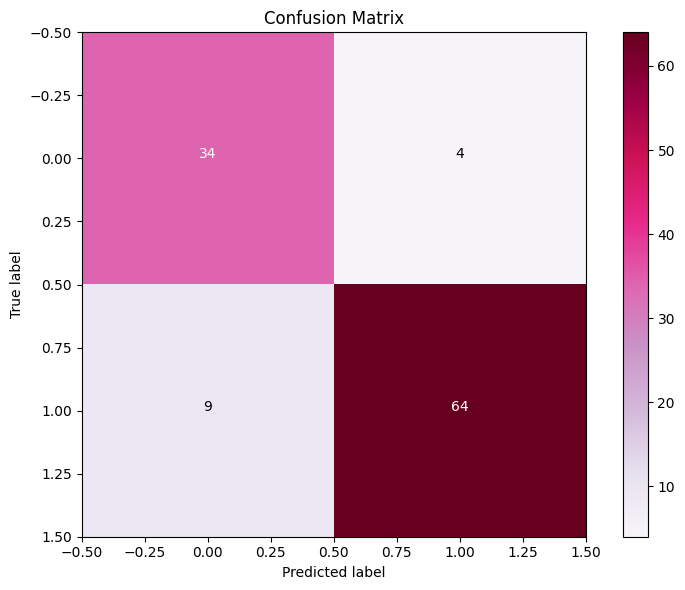

In [28]:
############# plot confusion matrix ############

from matplotlib import pyplot as plt
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, test_preds_Ada.round())
# Plot confusion matrix with custom color map

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.PuRd)  # Set cmap to custom color map
plt.title('Confusion Matrix')
plt.colorbar()

# Adding annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), #'d = integer
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout() #improves the layout of plots by preventing overlapping elements such as axis labels, tick labels, and titles
plt.show()


In [29]:
# ############# validaition_curve #####################
# from sklearn.model_selection import ValidationCurveDisplay
# ValidationCurveDisplay.from_estimator(
#    AdaBoostClassifier(**trial.params), compressed_dataset_X, label, param_name="n_estimators", param_range=range(50,500,10)
# )
# plt.show()